<a href="https://colab.research.google.com/github/sjdoescoding/CE802-Assignment/blob/main/CE802_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CE802 - Comparative Study

#Sections 



*   Importing Libraries & Uploading the data
*   Exploratory Data Analysis
*   Feature Engineering / Preprocessing
* Prediction
* Accuracies



In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


# Uploading the Dataset

df = pd.read_csv("/content/CE802_P2_Data.csv")


# Exploratory Data Analysis

In [ ]:
# Getting the size of the dataset
init_size = df.shape
print("The initial size of the data: {}".format(init_size), '\n')

# A look into the variables
print(df.columns)

The initial size of the data: (1500, 16) 

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'Class'],
      dtype='object')


In [ ]:
# Initial look into the dataset
df.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,4.92,-13.23,330,13.22,-5.51,41.10,16.72,-56.98,-748.72,20,9.75,259.66,8.00,-0.35,4.76,False
1,-9.33,-27.72,3,12.78,-9.12,5.31,9.90,-30.98,-436.72,2,-1.56,131.66,0.76,1.79,NaN,False
2,-15.09,-26.28,6,13.54,-7.75,5.67,9.93,-34.98,-482.72,2,-2.58,63.66,0.64,2.02,NaN,True
3,-18.09,-24.60,30,13.28,-8.61,3.51,10.02,-30.98,-414.72,2,-7.08,133.66,0.57,1.98,NaN,True
4,6.12,-8.64,300,14.94,-1.97,29.40,19.32,-36.98,-428.72,20,9.09,229.66,6.70,-3.83,NaN,True


We can see from an intial look into the dataset that feature F15 has NaN values in which will need to be addressed during the feature engineering.

In [ ]:
# Checking for NaN values in F15 variable
df['F15'].isnull().sum()

750

There are 750 NaN values in F15, with this many NaN values it may be worth to drop the entire column if it negatively impacts the prediction of Diabetes.

In [ ]:
# Checking datatypes
print(df.dtypes, '\n')

print('The number of datatypes for the features: ','\n', df.dtypes.value_counts())

F1       float64
F2       float64
F3         int64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10        int64
F11      float64
F12      float64
F13      float64
F14      float64
F15      float64
Class       bool
dtype: object 

The number of datatypes for the features:  
 float64    13
int64       2
bool        1
dtype: int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
F1,1500.0,-4.569780,7.662813,-29.76,-10.2600,-7.560,2.9175,8.85
F2,1500.0,-20.474600,7.635517,-45.57,-26.1300,-23.445,-13.1100,-6.78
F3,1500.0,109.024667,117.334580,0.00,15.0000,50.000,195.0000,390.00
F4,1500.0,12.744707,2.217929,8.02,11.4400,12.440,13.9000,21.22
F5,1500.0,-6.248787,2.540644,-15.28,-8.1300,-7.230,-3.7700,-1.59
F6,1500.0,14.906280,12.975630,0.00,3.7200,6.210,24.6000,47.10
F7,1500.0,13.107813,3.166909,9.42,10.1400,10.500,15.8700,19.57
F8,1500.0,-42.256000,14.318630,-76.98,-56.9800,-34.980,-30.9800,-24.98
F9,1500.0,-557.610667,142.833748,-888.72,-678.7200,-486.720,-446.7200,-398.72
F10,1500.0,10.806667,9.009814,0.00,2.0000,2.000,20.0000,20.00


We can see that some features hold the value of 0, however, these will not be addressed due to not knowing the value of the feature inherently without testing. If the 0 values impact the accuracy of the accuracy then the dataset can be re-engineered in future experiments. 

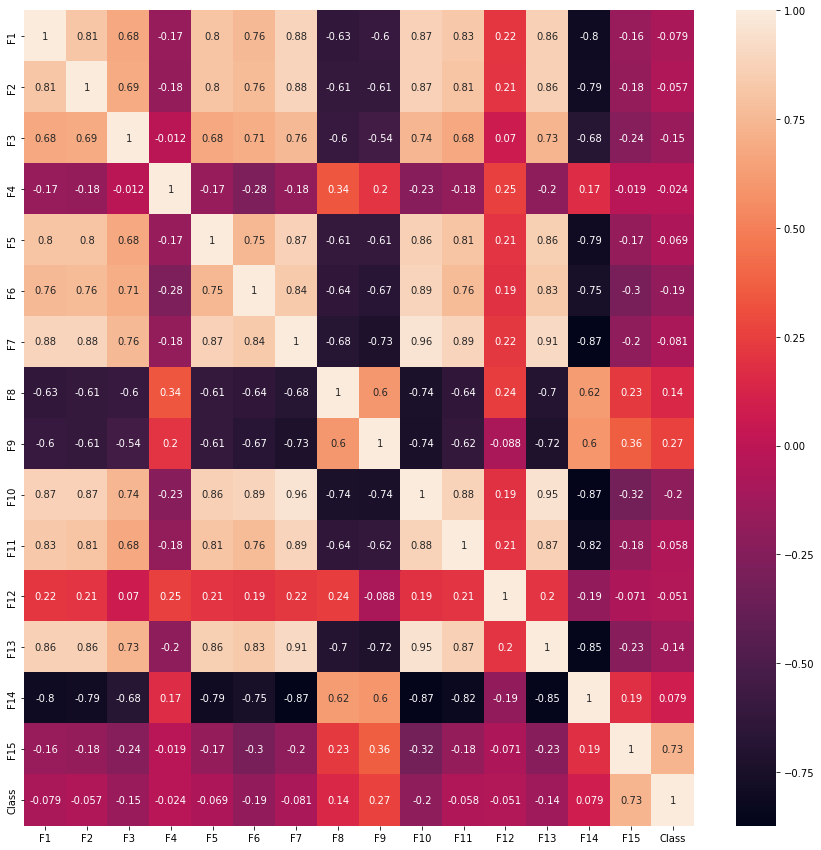

In [ ]:
# Correlation heatmap of the features
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cbar=True,annot=True)

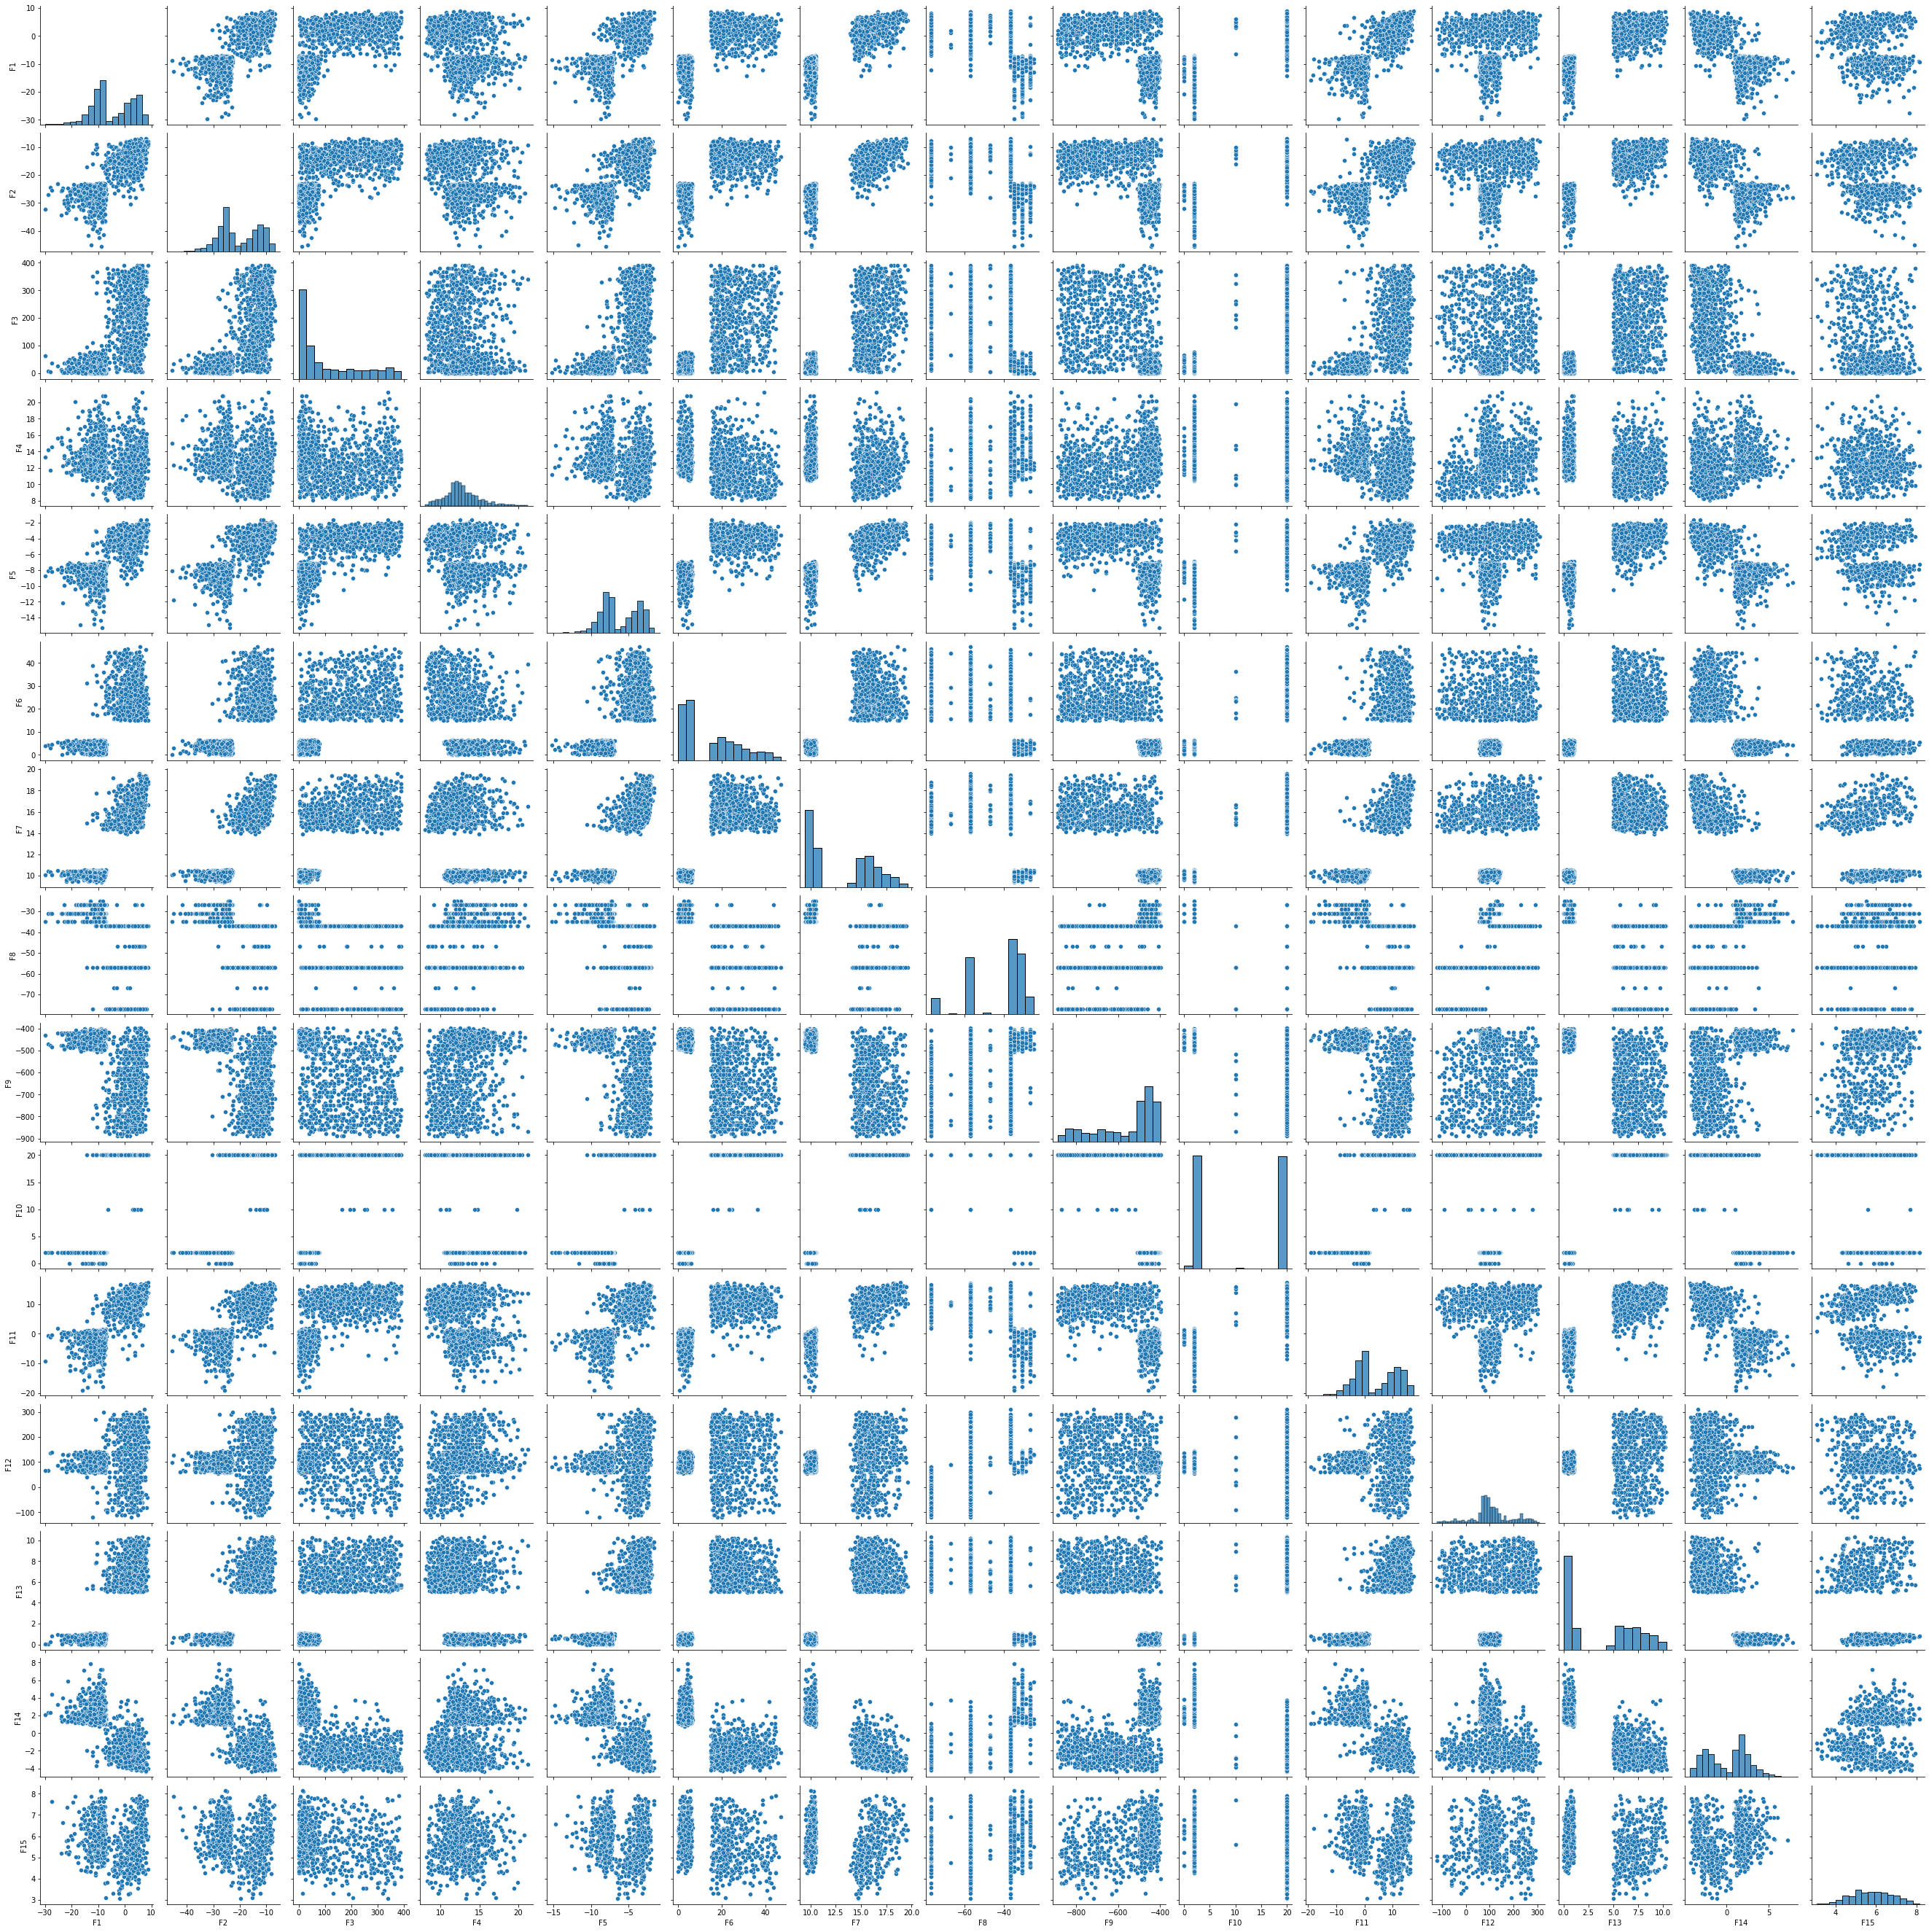

In [ ]:
# Remove the 'Class' Target as pairplot does not work well with a boolean feature
# df_pairplot = df.drop(columns = ['Class'], axis = 1)

# sns.pairplot(df_pairplot)
# plt.show()

#Feature Engineering / Preprocessing

From the dataset we can initially remove the F15 feature due to it's vast amount of Nan values.

In [ ]:
# The size of the data before the 'F15' feature has been dropped
print("The size of the data before dropping 'F15' feature is : {} ".format(df.shape))

df = df.drop(columns = ['F15'], axis = 1) # Dropping 'F15' Column

print("The size of the data after dropping 'F15' feature is : {} ".format(df.shape))

The size of the data before dropping 'F15' feature is : (1500, 16) 
The size of the data after dropping 'F15' feature is : (1500, 15) 


In [ ]:
# We can see that the F15 column has been dropped, therefore leading to a better prediction.
df.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'Class'],
      dtype='object')

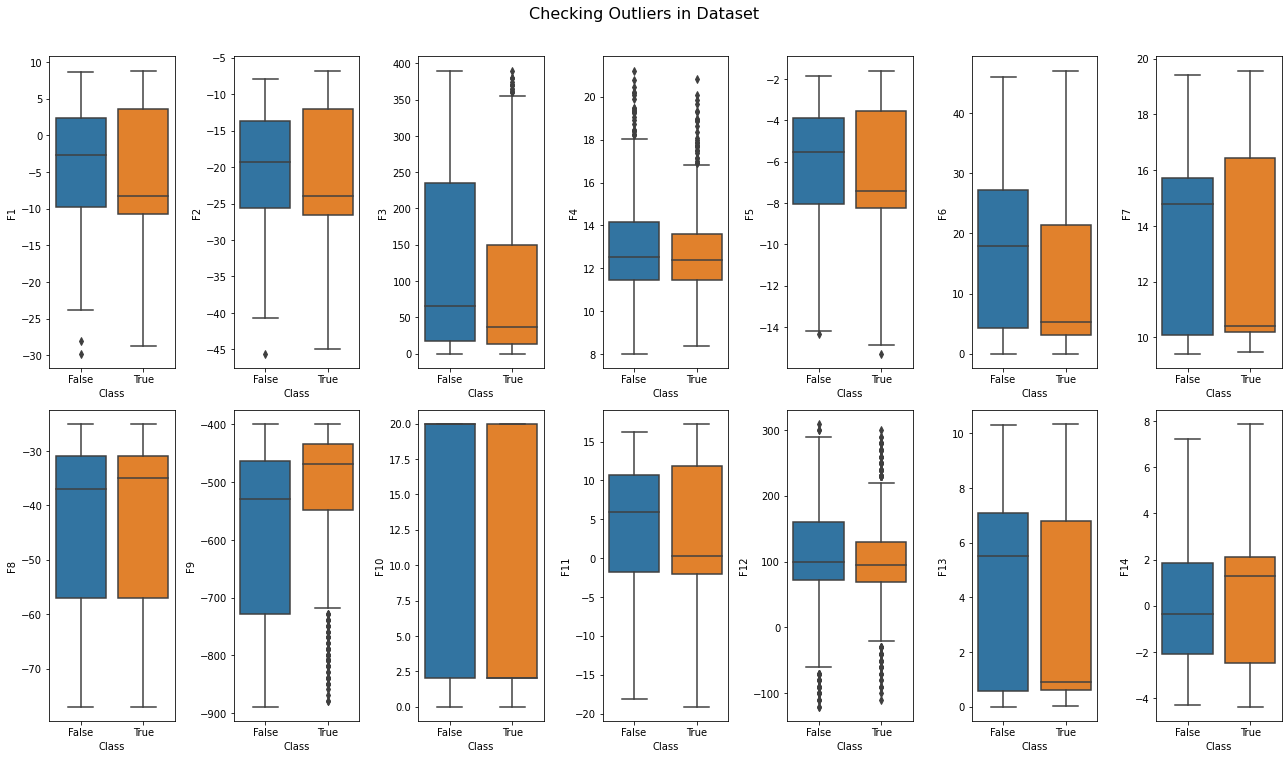

In [ ]:
# Boxplots to see outliers in the dataset
fig, axes = plt.subplots(2,7, figsize = (18,10))

fig.suptitle('Checking Outliers in Dataset', y=1.05, fontsize = 16)

# Drawing the boxplots for each feature 
sns.boxplot(ax=axes[0,0], data=df, x = 'Class', y = 'F1')

sns.boxplot(ax=axes[0,1], data=df, x = 'Class', y = 'F2')

sns.boxplot(ax=axes[0,2], data=df, x = 'Class', y = 'F3')

sns.boxplot(ax=axes[0,3], data=df, x = 'Class', y = 'F4')

sns.boxplot(ax=axes[0,4], data=df, x = 'Class', y = 'F5')

sns.boxplot(ax=axes[0,5], data=df, x = 'Class', y = 'F6')

sns.boxplot(ax=axes[0,6], data=df, x = 'Class', y = 'F7')

sns.boxplot(ax=axes[1,0], data=df, x = 'Class', y = 'F8')

sns.boxplot(ax=axes[1,1], data=df, x = 'Class', y = 'F9')

sns.boxplot(ax=axes[1,2], data=df, x = 'Class', y = 'F10')

sns.boxplot(ax=axes[1,3], data=df, x = 'Class', y = 'F11')

sns.boxplot(ax=axes[1,4], data=df, x = 'Class', y = 'F12')

sns.boxplot(ax=axes[1,5], data=df, x = 'Class', y = 'F13')

sns.boxplot(ax=axes[1,6], data=df, x = 'Class', y = 'F14')

fig.tight_layout()
plt.show()
